# Chapter 6. Statistical machine learning

Statistical machine learning is distinguished from classical statistical methods in that they are data-driven and do not seek to impose linear or other overall structure on the data

**Machine learning versus statistics:** In the context of prediction modeling, there is not a bright line dividing the two disciplines. Machine learning tends to be focused more on developing efficient algorithms that scale to large data in order to optimize the predictive model. Statistics generally pays more attention to the probabilistic theory and underlying structure of the model. Bagging, and the random forest, grew up firmly in the statistic camp. Boosting, on the other hand, has been developed in both disciplines but receives more attention on the machine learning side of the divide. Regardless of the history, the promise of boosting ensures that it will thrive as a technique in both statistics and machine learning

## 6.1 K-nearest neighbors

For each record to be classified or predicted:
1. Find K records that have similar features (i.e. similar predictor values)
2. For classification, find out what the majority class is among those similar records and assign that class to the new record
3. For prediction (also called KNN regression), find the average among those similar records, and predict that average for the new record

There is no model to be fit. But the prediction results depend on how the features are scaled, how similarity is measured, and how big K is set. Also, all predictors must be in numeric form

### A small example: predicting load default

In [2]:
import pandas as pd
import numpy as np

loan200 = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan200.csv')
loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [9]:
from sklearn.neighbors import KNeighborsClassifier

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X, y)
print(knn.predict(newloan))
print(knn.predict_proba(newloan))

['paid off']
[[0.45 0.55]]


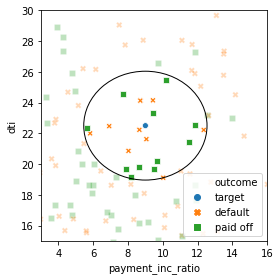

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.patches import Ellipse

nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

### Distance metrics

Similarity (nearness) is determined using a distance metric, which is a function that measures how far two records (x , x , …, x ) and (u , u , …, u ) are from one another. The most popular distance metric between two vectors is Euclidean distance. To measure the Euclidean distance between two vectors, subtract one from the other, square the differences, sum them, and take the square root:

√(x1 − u1)^2 + (x2 − u2)^2 +⋯+ (xp − up)^2.

Another common distance metric for numeric data is Manhattan distance:

|x1 − u1| + |x2 − u2| +⋯+ |xp − up|

Euclidean distance corresponds to the straight-line distance between two points (e.g., as the crow flies). Manhattan distance is the distance between two points traversed in a single direction at a time (e.g., traveling along rectangular city blocks). For this reason, Manhattan distance is a useful approximation if similarity is defined as point-to-point travel time.

In measuring distance between two vectors, variables (features) that are measured with comparatively large scale will dominate the measure. To address the problem by standardizing the data

**Other distance metrics:** There are numerous other metrics for measuring distance between vectors. For numeric data, Mahalanobis distance is attractive since it accounts for the correlation between two variables. This is useful since if two variables are highly correlated, Mahalanobis will essentially treat these as a single variable in terms of distance. Euclidean and Manhattan distance do not account for the correlation, effectively placing greater weight on the attribute that underlies those features. Mahalanobis distance is the Euclidean distance between the principal components. The downside of using Mahalanobis distance is increased computational effort and complexity; it is computed using the covariance matrix

### One hot encoder

In linear and logistic regression, one hot encoding causes problems with multicollinearity. In such cases, one dummy is omitted (its value can be inferred from the other values). This is not an issue with KNN

### Standardization (normalization, z-scores)

Standardization, also called normalization, puts all variables on similar scales by subtracting the mean and dividing by the standard deviation. in this way, we ensure that a variable does not overly influence a model simply due to the scale of its original measurement:

The result of this transformation is commonly referred to as a z-score. Measurements are then stated in terms of “standard deviations away from the mean.”

Note: Normalization in this statistical context is not to be confused with database normalization, which is the removal of redundant data and the verification of data dependencies.

For KNN and a few other procedures (e.g., principal components analysis and clustering), it is essential to consider standardizing the data prior to applying the procedure

The sklearn.preprocessing.StandardScaler method is first trained with the predictors and is subsequently used to transform the data set prior to training the KNN model

In [7]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

loan_data = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan_data.csv.gz', compression = 'gzip')

loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]

X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)
X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


Using the z-score is just one way to rescale variables. Instead of the mean, a more robust estimate of location could be used, such as the median. Likewise, a different estimate of scale such as the interquartile range could be used instead of the standard deviation. Sometimes, variables are “squashed” into the 0–1 range. It’s also important to realize that scaling each variable to have unit variance is somewhat arbitrary. This implies that each variable is thought to have the same importance in predictive power. If you have subjective knowledge that some variables are more important than others, then these could be scaled up. For example, with the loan data, it is reasonable to expect that the payment-to-income ratio is very important.

**Note:** Normalization (standardization) does not change the distributional shape of the data; it does not make it normally shaped if it was not already normally shaped

### Choosing K

Generally speaking, if K is too low, we may be overfitting: including the noise in the data. Higher values of K provide smoothing that reduces the risk of overfitting in the training data. On the other hand, if K is too high, we may oversmooth the data and miss out on KNN’s ability to capture the local structure in the data, one of its main advantages

The K that best balances between overfitting and oversmoothing is typically determined by accuracy metrics and, in particular, accuracy with holdout or validation data. There is no general rule about the best K—it depends greatly on the nature of the data. For highly structured data with little noise, smaller values of K work best. Borrowing a term from the signal processing community, this type of data is sometimes referred to as having a high signal-to-noise ratio (SNR). Examples of data with a typically high SNR are data sets for handwriting and speech recognition. For noisy data with less structure (data with a low SNR), such as the loan data, larger values of K are appropriate. Typically, values of K fall in the range 1 to 20. Often, an odd number is chosen to avoid ties

**Bias variance trade-off:** The tension between oversmoothing and overfitting is an instance of the bias-variance trade-off, a ubiquitous problem in statistical model fitting. Variance refers to the modeling error that occurs because of the choice of training data; that is, if you were to choose a different set of training data, the resulting model would be different. Bias refers to the modeling error that occurs because you have not properly identified the underlying realworld scenario; this error would not disappear if you simply added more training data. When a flexible model is overfit, the variance increases. You can reduce this by using a simpler model, but the bias may increase due to the loss of flexibility in modeling the real underlying situation. A general approach to handling this trade-off is through cross validation

### KNN as a feature engine

KNN can be used to add “local knowledge” in a staged process with other classification techniques:
1. KNN is run on the data, and for each record, a classification (or quasi-probability of a class) is derived
2. That result is added as a new feature to the record, and another classification method is then run on the data. The original predictor variables are thus used twice.

At first you might wonder whether this process, since it uses some predictors twice, causes a problem with multicollinearity. This is not an issue, since the information being incorporated into the second-stage model is highly local, derived only from a few nearby records, and is therefore additional information and not redundant.

You can think of this staged use of KNN as a form of ensemble learning, in which multiple predictive modeling methods are used in conjunction with one another. It can also be considered as a form of feature engineering in which the aim is to derive features (predictor variables) that have predictive power. Often this involves some manual review of the data; KNN gives a fairly automatic way to do this.

For example, consider the King County housing data. In pricing a home for sale, a realtor will base the price on similar homes recently sold, known as “comps.” In essence, realtors are doing a manual version of KNN: by looking at the sale prices of similar homes, they can estimate what a home will sell for. We can create a new feature for a statistical model to mimic the real estate professional by applying KNN to recent sales. The predicted value is the sales price, and the existing predictor variables could include location, total square feet, type of structure, lot size, and number of bedrooms and bathrooms. The new predictor variable (feature) that we add via KNN is the KNN predictor for each record (analogous to the realtors’ comps). Since we are predicting a numerical value, the average of the K-Nearest Neighbors is used instead of a majority vote (known as KNN regression).

In [8]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

loan_data['borrower_score'] = knn.predict_proba(X)[:,1]
loan_data['borrower_score'].describe()

count    45342.000000
mean         0.498896
std          0.128734
min          0.050000
25%          0.400000
50%          0.500000
75%          0.600000
max          1.000000
Name: borrower_score, dtype: float64

The result is a feature that predicts the likelihood a borrower will default based on his credit history.

## 6.2 Tree models

## 6.3 Bagging and the random forest

## 6.4 Boosting 